<a href="https://colab.research.google.com/github/akshithaa1/project_ML/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ejlok1/cremad

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 98% 441M/451M [00:05<00:00, 71.8MB/s]
100% 451M/451M [00:05<00:00, 89.5MB/s]


In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 424M/429M [00:02<00:00, 144MB/s]
100% 429M/429M [00:02<00:00, 150MB/s]


In [ ]:
!kaggle datasets download -d barelydedicated/savee-database

Dataset URL: https://www.kaggle.com/datasets/barelydedicated/savee-database
License(s): copyright-authors
 94% 201M/215M [00:04<00:00, 43.9MB/s]
100% 215M/215M [00:04<00:00, 46.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cremad.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ravdess-emotional-speech-audio.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/savee-database.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import librosa
import librosa.display
from IPython.display import Audio
import warnings

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint




warnings.filterwarnings("ignore")

In [ ]:

import os
import pandas as pd

# Assuming you've already unzipped the dataset into the 'crema' directory
!unzip /content/cremad.zip -d /content/crema

# List the contents of the 'crema' directory
crema_dir = os.listdir('/content/crema')

emotions = []
paths = []

for file in crema_dir:
    # storing file paths
    paths.append("/content/crema/" + file)  # Fixed path creation
    # storing file emotions
    part = file.split('_')
    if len(part) >= 3:  # Check if there are enough parts
        emotions.append(part[2])
    else:
        emotions.append("Unknown")  # Handle the case where there aren't enough parts

# Creating dataframe out of lists
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])

Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Mapping emotion codes to human-readable emotions
e_dict = {'DIS': 'disgusted', 'HAP': 'happy', 'SAD': 'sad', 'FEA': 'fear', 'ANG': 'angry', 'NEU': 'neutral'}
Crema_df["Emotions"] = Crema_df["Emotions"].map(e_dict)

Crema_df.head()



Streaming output truncated to the last 5000 lines.
  inflating: /content/crema/AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: /content/crema/AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: /content/crema/AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: /content/crema/AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: /content/crema/AudioWAV/1031_IEO_HAP_MD.wav  
  inf

Emotions                     Path
0      NaN  /content/crema/AudioWAV

In [ ]:
Crema_df["Emotions"].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
import os
import pandas as pd

# Assuming you've already unzipped the dataset into the 'ravdess-emotional-speech-audio' directory
!unzip /content/ravdess-emotional-speech-audio.zip -d /content/ravdess-emotional-speech-audio

# List the contents of the 'ravdess-emotional-speech-audio' directory
ravdess_dir = os.listdir('/content/ravdess-emotional-speech-audio')

file_emotion = []
file_path = []

for i in ravdess_dir:
    actor = os.listdir('/content/ravdess-emotional-speech-audio/' + i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # Check if there are enough parts in the filename
        if len(part) >= 3:
            # Third part in each file is emotion
            file_emotion.append(int(part[2]))
            file_path.append('/content/ravdess-emotional-speech-audio/' + i + '/' + file)
        else:
            print(f"Skipping file {file} due to unexpected filename structure.")

# List to DataFrame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Mapping emotion codes to human-readable emotions
emotion_mapping = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgusted',
    8: 'surprised'
}

Ravdess_df['Emotions'] = Ravdess_df['Emotions'].map(emotion_mapping)

Ravdess_df.head()



Archive:  /content/ravdess-emotional-speech-audio.zip
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/ravdess-emotional-speech-audio/Act

Emotions                                               Path
0     calm  /content/ravdess-emotional-speech-audio/Actor_...
1  neutral  /content/ravdess-emotional-speech-audio/Actor_...
2      sad  /content/ravdess-emotional-speech-audio/Actor_...
3    happy  /content/ravdess-emotional-speech-audio/Actor_...
4    happy  /content/ravdess-emotional-speech-audio/Actor_...

In [ ]:
Ravdess_df["Emotions"].value_counts()

Emotions
calm         192
sad          192
happy        192
disgusted    192
angry        192
surprised    192
fear         192
neutral       96
Name: count, dtype: int64

**Save**
Info.txt =>


**Speakers**

'DC', 'JE', 'JK' and 'KL' are four male speakers recorded for the SAVEE database

**Audio data**

Audio files consist of audio WAV files sampled at 44.1 kHz

There are 15 sentences for each of the 7 emotion categories. The initial letter(s) of the file name represents the emotion class, and the following digits represent the sentence number. The letters 'a', 'd', 'f', 'h', 'n', 'sa' and 'su' represent 'anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness' and 'surprise' emotion classes respectively. E.g., 'd03.wav' is the 3rd disgust sentence

In [ ]:
# used "next" with "walk" cause "os.listdir" gives error
directory_list = next(os.walk('/content/AudioData'))[1]
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir('/content/AudioData' +"/"+ i)
    for file in actor:
        file_emotion.append(file[:-6])
        file_path.append('/content/AudioData'+"/" + i + '/' + file)

# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# letter to full emotion
Savee_df.Emotions.replace({'a':'angry', 'd':'disgusted', 'f':'fear', 'h':'happy', 'n':'neutral', 'sa':'sad' , 'su':'surprised'}, inplace=True)
Savee_df.head()

Emotions                            Path
0  surprised  /content/AudioData/JE/su06.wav
1  disgusted   /content/AudioData/JE/d09.wav
2    neutral   /content/AudioData/JE/n01.wav
3    neutral   /content/AudioData/JE/n25.wav
4    neutral   /content/AudioData/JE/n17.wav

In [ ]:
# creating Dataframe using above 3 dataframes.
df = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0     calm  /content/ravdess-emotional-speech-audio/Actor_...
1  neutral  /content/ravdess-emotional-speech-audio/Actor_...
2      sad  /content/ravdess-emotional-speech-audio/Actor_...
3    happy  /content/ravdess-emotional-speech-audio/Actor_...
4    happy  /content/ravdess-emotional-speech-audio/Actor_...

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df["Emotions"].value_counts()

Emotions
sad          252
happy        252
disgusted    252
angry        252
surprised    252
fear         252
neutral      216
calm         192
Name: count, dtype: int64

**EDA**

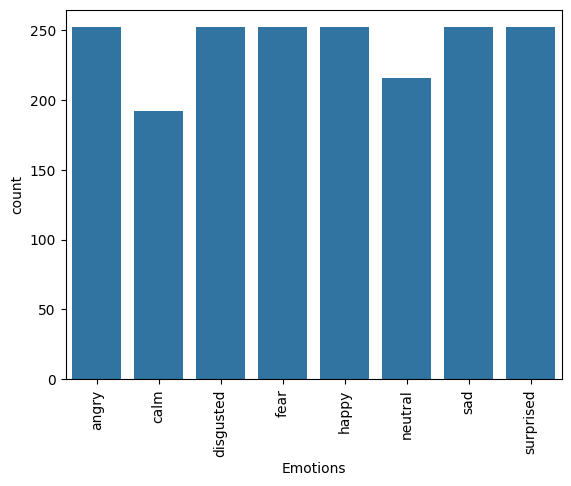

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Emotions"] = df["Emotions"].astype("category")

plt.xticks(rotation='vertical')
sns.countplot(data=df, x="Emotions")
plt.show()



In [ ]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

In [ ]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

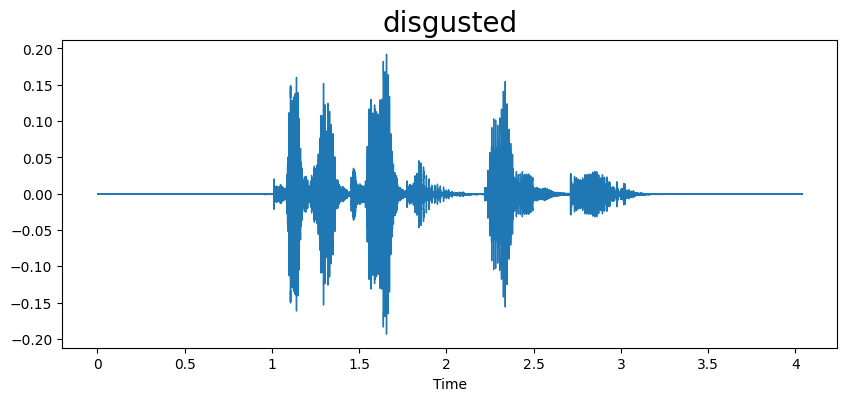

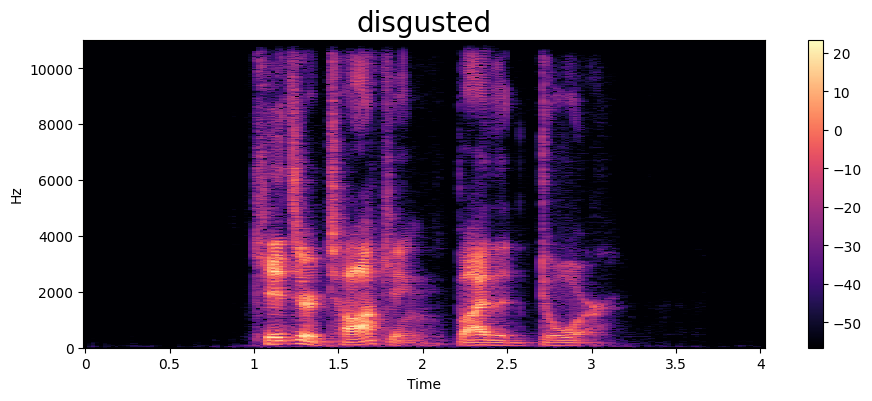

In [ ]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

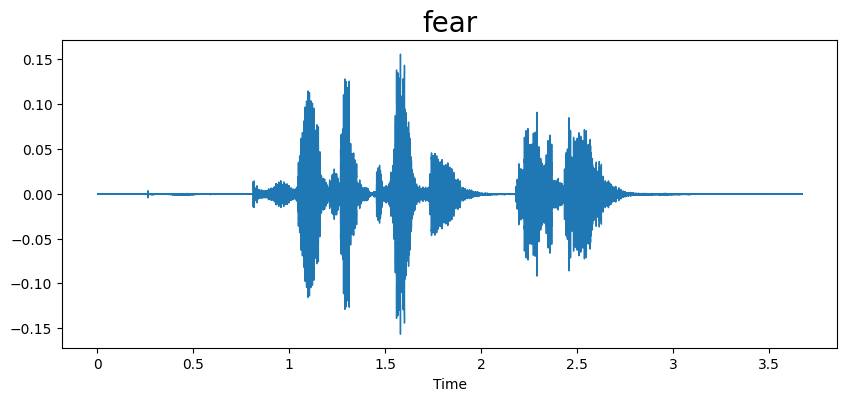

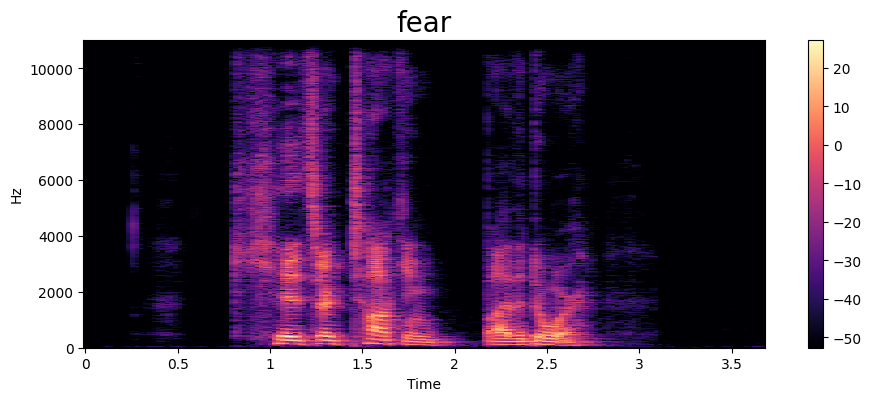

In [ ]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

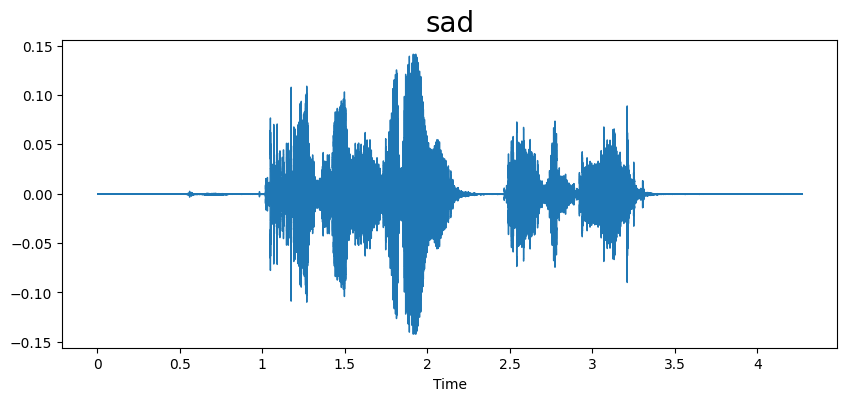

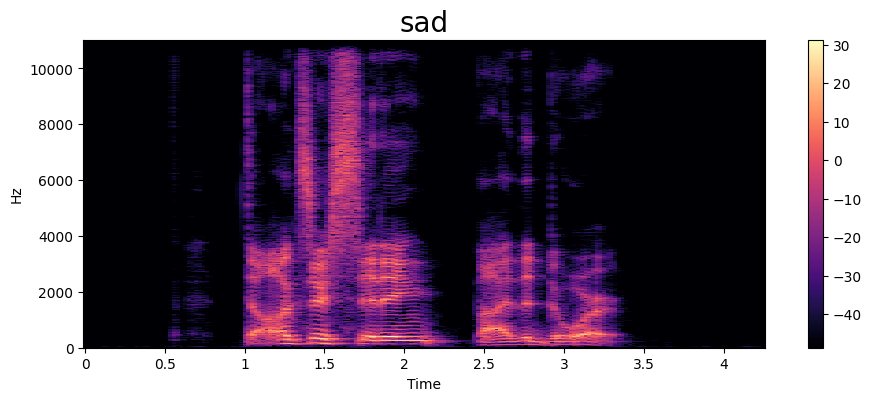

In [ ]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

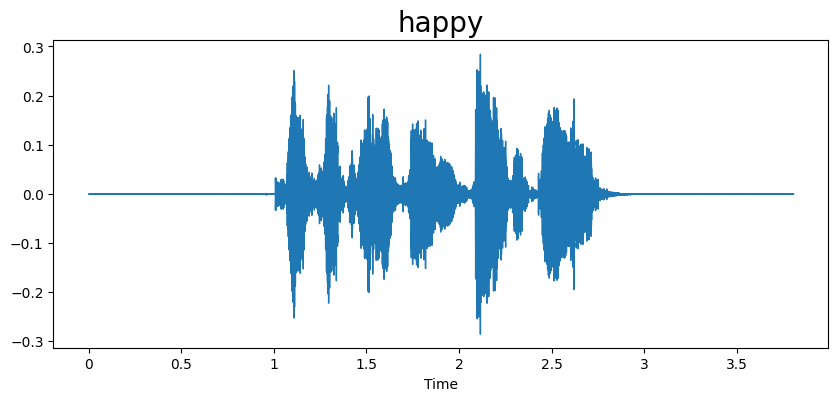

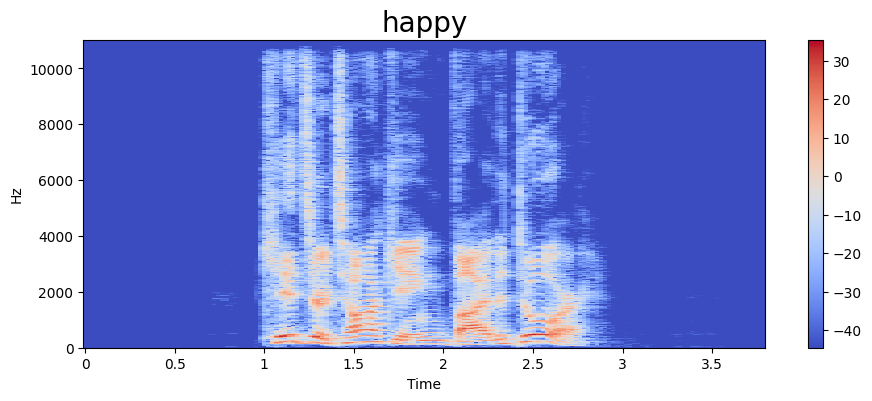

In [ ]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

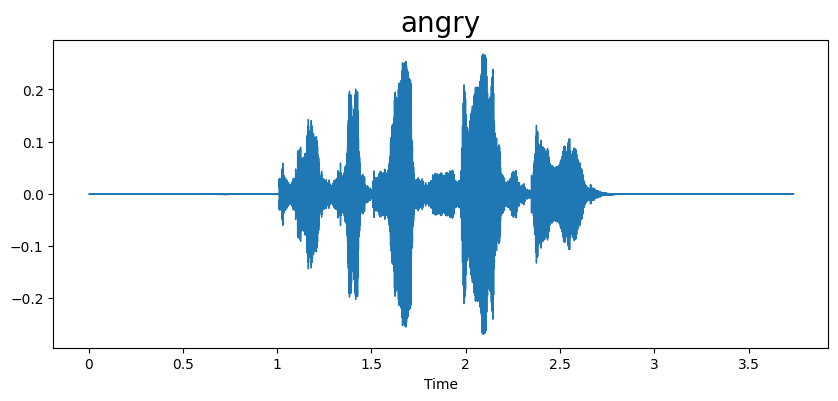

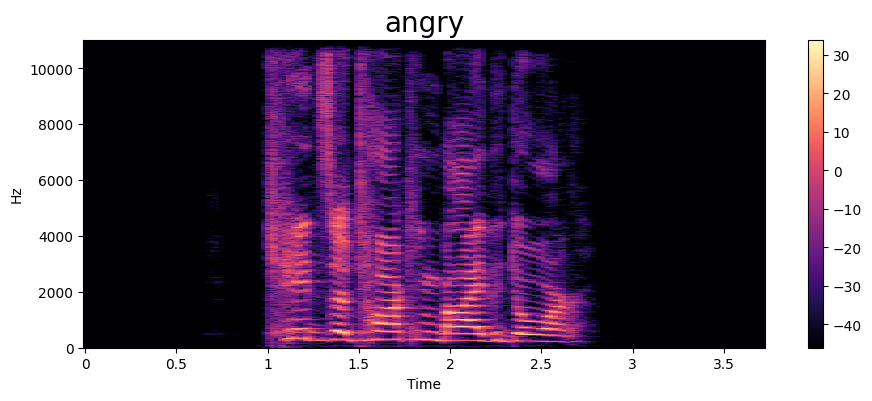

In [ ]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[100]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

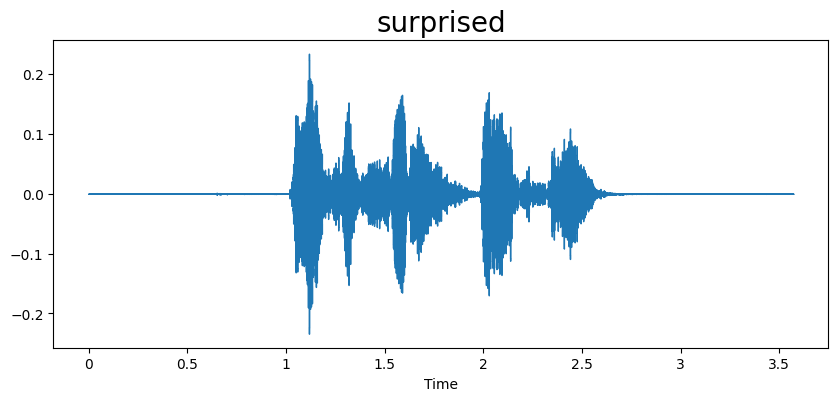

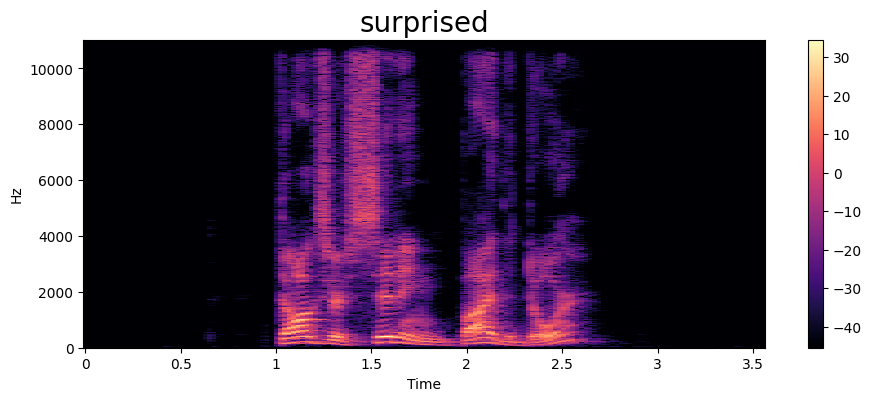

In [ ]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

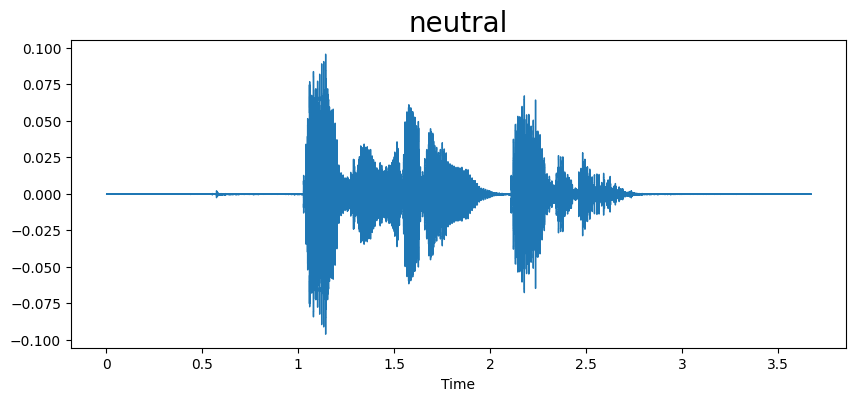

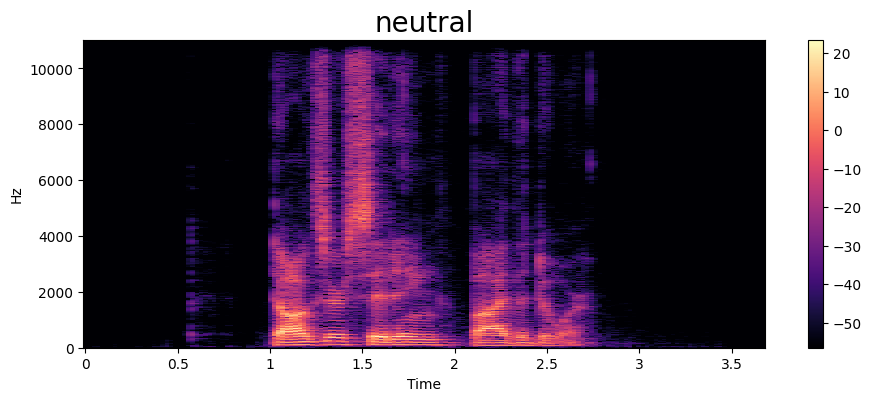

In [ ]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

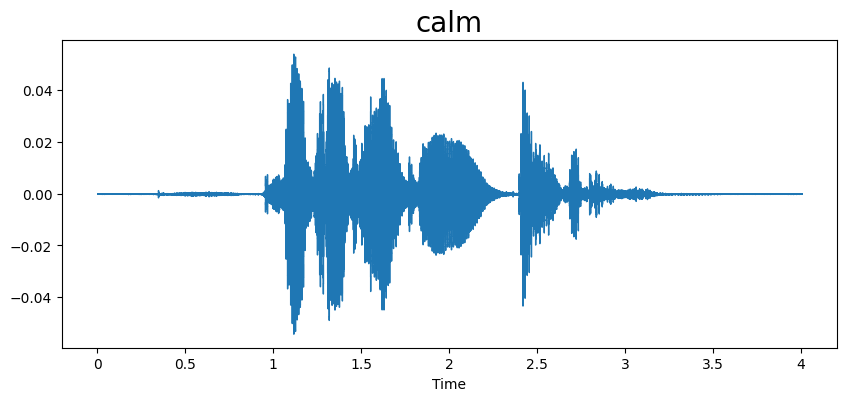

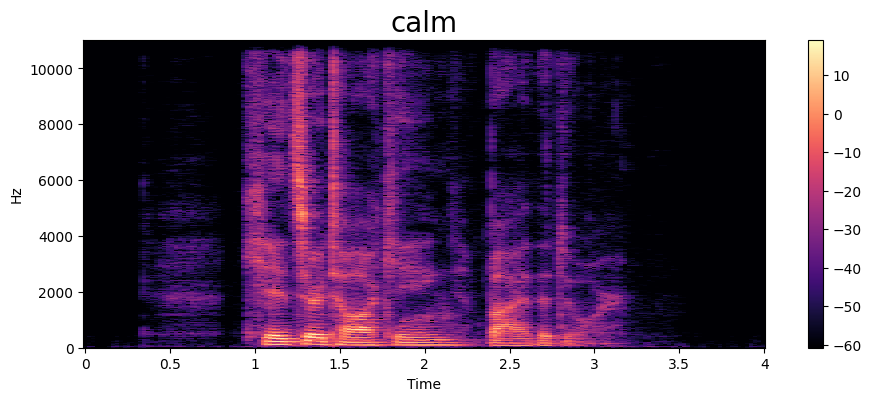

In [ ]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

DATA **AUGMENTATION**

In [ ]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

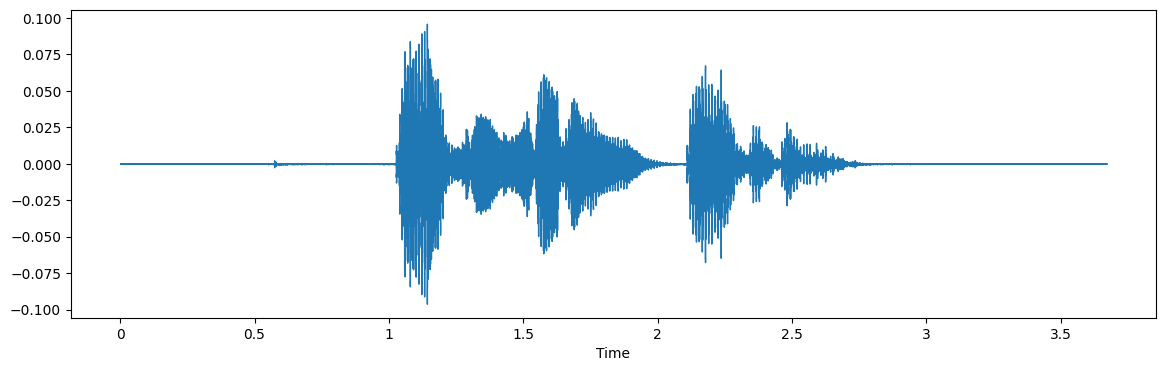

In [ ]:
# simple
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

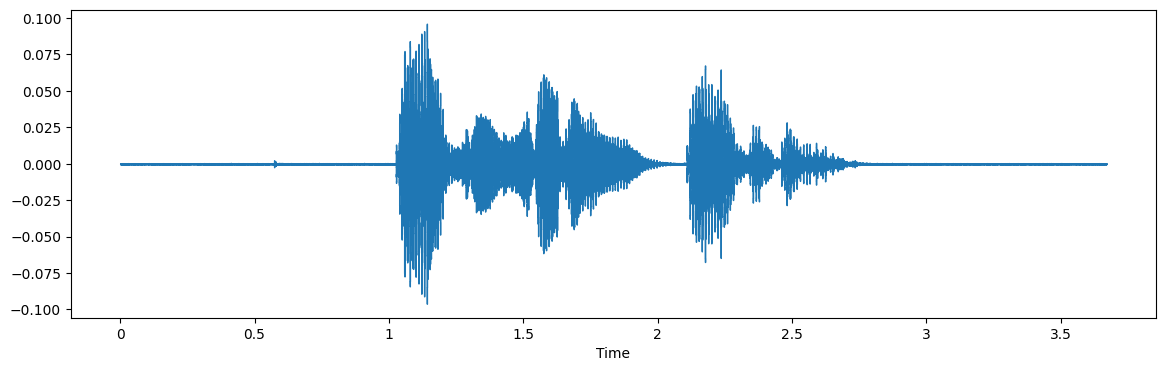

In [ ]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
# Assuming you have a function named 'stretch' to stretch the audio
def stretch(data):
    # Implement your stretch function here
    # Example: return librosa.effects.time_stretch(data, rate=2.0)
    pass





In [ ]:
# Assuming you have a function named 'stretch' to stretch the audio
def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate=rate)


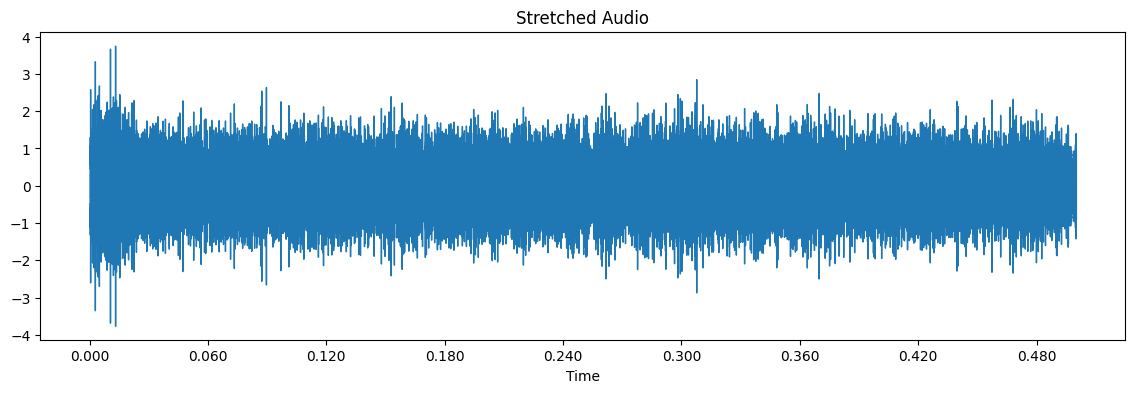

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Assuming you have a function named 'stretch' to stretch the audio
def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate=rate)

# Replace 'your_audio_data' and 'your_sample_rate' with your actual audio data and sample rate
your_audio_data = np.random.randn(44100)  # Example data
your_sample_rate = 44100  # Example sample rate

# Set the stretching rate (adjust as needed)
stretch_rate = 2.0

x = stretch(your_audio_data, rate=stretch_rate)

# Ensure the stretched audio is 1-dimensional
if x is not None and x.ndim > 1:
    x = np.mean(x, axis=0)

# Visualize the stretched audio
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=your_sample_rate)
plt.title('Stretched Audio')
plt.show()

# Play the stretched audio
Audio(x, rate=your_sample_rate)


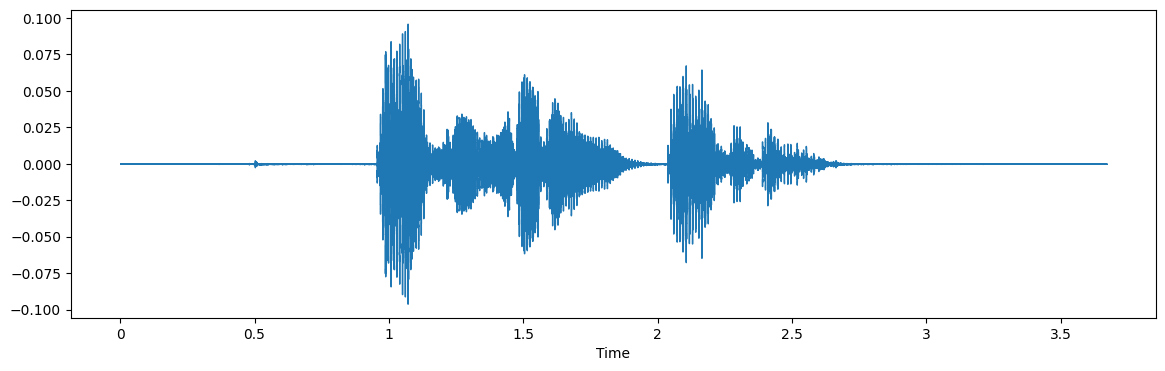

In [ ]:
# shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def pitch(data):
   pass




In [ ]:
# Assuming you have a function named 'pitch' to pitch the audio
def pitch(data, rate):
    return librosa.effects.time_pitch(data, rate=rate)

**FEATURE EXTRACTION**

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

def get_features(path):
    # duration and offset are used to take care of
#     the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    # stretching and pitching
    new_data = stretch(data)
    res3 = extract_features(data_stretch)
    result = np.vstack((result, res3))

    return result

In [ ]:
def get_features(path):
    # Your implementation to extract features from the given path
    # Replace this with your actual feature extraction code
    features = [0.1, 0.2, 0.3]  # Example features, replace with actual values
    return features



In [ ]:
X, Y = [], []

di=zip(df["Path"], df["Emotions"])
for path, emotion in di :
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [ ]:
len(X), len(Y), df["Path"].shape

(5763, 5763, (1921,))

In [ ]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

0 Emotions
0  0.1     calm
1  0.2     calm
2  0.3     calm
3  0.1  neutral
4  0.2  neutral

**DATA PREPARATION**

In [ ]:
X = new_df.iloc[: ,:-1].values
Y = new_df['Emotions'].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20 , shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4610, 1), (4610, 9), (1153, 1), (1153, 9))

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4610, 1), (4610, 9), (1153, 1), (1153, 9))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4610, 1, 1), (4610, 9), (1153, 1, 1), (1153, 9))

**MODEL CREATION**

In [ ]:
print(x_train.shape)


(4610, 1, 1)


In [ ]:
model = Sequential()

In [ ]:
model.add(MaxPooling1D(2))


In [ ]:
print("Input shape:", x_train.shape)


Input shape: (4610, 1, 1)
